In [1]:
import torch
# import torch_neuron
from neuronocr_compilation import easyocr
from neuronocr_compilation.easyocr.detection import get_detector

def save_model():
    ocr_reader = easyocr.Reader(['en'], detector=True, recognizer=False, gpu=False, download_enabled=False, model_storage_directory='model_file', user_network_directory='user_network')
    network = get_detector(r'model_file/craft_mlt_25k.pth')
    image = torch.zeros([1, 3, 224, 224], dtype=torch.float32)
    model_neuron = torch.neuron.trace(network, example_inputs=[image])
    model_neuron.save("ocr_neuron.pt")
    print('Model Saved')
    return model_neuron, ocr_reader

In [4]:
import cv2
from neuronocr_compilation import easyocr
import torch
# import torch_neuron

def infer_image(image, ocr_reader):
    net_neuron = torch.jit.load('ocr_neuron.pt')
    resized_image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
    result = ocr_reader.detect(resized_image, net=net_neuron)
    return result

In [5]:
from matplotlib import pyplot as plt
import cv2

def plot_bbox(image, result):
    resized_image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
    for coord in result[0][0]:
        image = cv2.rectangle(resized_image, (coord[0],coord[2]), (coord[1],coord[3]), (0, 255, 0), 2)
    plt.imshow(resized_image)
    plt.title('Detected Text')
    plt.show()

In [6]:
model_neuron, ocr_reader = save_model()

Using CPU. Note: This module is much faster with a GPU.


AttributeError: module 'torch' has no attribute 'neuron'

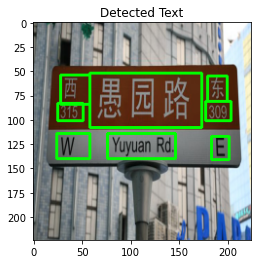

In [5]:
image = cv2.imread('images/chinese.jpg')
result = infer_image(image, ocr_reader)
plot_bbox(image,result)